# Introduction to mathematical modeling (of biomedical systems)
The purpose of this course is to learn how to build predictive mathematical models of biological systems. Level: Master; Pre-requisites: Basic mathematics course, basic Python/programming skills.
## Section 0: General information (See also 101D_NetworksAnalysis_Introduction)
The quantitative analysis of a biological phenomenon, whether at the systems level or for a distinct cellular pathway, requires the choice of a modeling framework (see Figure 1). This choice (green boxes) must be guided by simple questions which relate to the characteristics of the phenomenon we are studying, the type of input we have in hand, and the type of output we expect from the model (blue boxes).
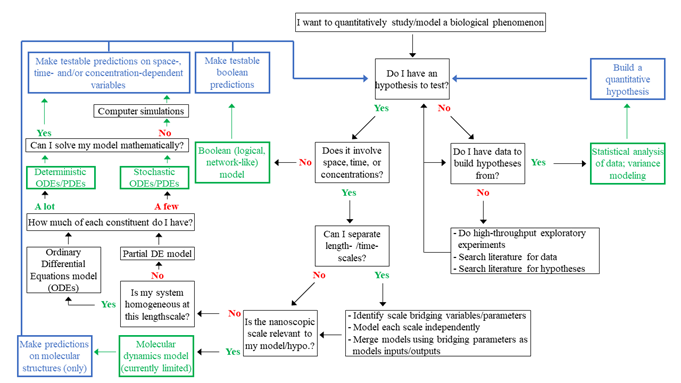

The first question to ask is “do I have a biological hypothesis to test?”. Indeed, a mathematical model requires a certain amount of knowledge on the system, for instance which proteins are interacting in a certain pathway. Otherwise, building the model will be impossible. But it also requires a certain number of unknown interactions or parameters: modeling a system for which everything is know will not allow to predict anything. Any model must thus be based on a solid ground of known mechanisms and parameters, and include some unknown mechanisms and hypotheses for which the model will allow to test quantitatively the plausibility.
Therefore we need to be able to quantitatively representing hypotheses and formalize vague problems, then choose model components, objectives, assumptions, variables and parameters, conservation laws, ubiquity, novelty…
But first, what is a model? And what is a mathematical model? 

Let’s start with an example. Assume 100 birds in a forest, to simplify we will always assume there are as many females as males. Each couple has 1 chick per year. We can call this our model for bird population growth. How many birds will there be in the next year? In two years from now? How many birds in 50 years? Answering these questions requires to put numbers on our model, building a “mathematical model”. 
Let’s write a code to answer these questions:

In [1]:
Birds_year0 = 100 
# we set the initial number of birds to 100

In [2]:
Birth_rate = 0.5
# we set the birth rate to 0.5, i.e. each couple of birds gives birth to one chick hence each bird to "half a chick"

In [3]:
Birds_year1 = Birds_year0 + Birds_year0 * Birth_rate; print(Birds_year1)
# we compute the total number of birds after a year: initial number + number of chicks and print the total

150.0


In [4]:
Birds_year2 = Birds_year1 + Birds_year1 * Birth_rate; print(Birds_year2)
# we compute the total number of birds after 2 years: number after one year + number of chicks born from all birds at year 1; print result

225.0


In [5]:
# To compute the number of birds after 50 years, we need to repeat the above 50 times. 
# To to do, we use a "for" loop: at each year, represented by a running index "year" that is incremented by 1 unit at each iteration within the specified range, 
# we compute the number of chicks by multiplying the current number of birds "Birds" by the birth rate. Then we add the number
# of chicks to "Birds" to get the total number of birds for the next year. At each year, we print the resulting total number of birds
# We note that the last iteration (# 51 here) is not performed. 
Birds=100
for year in range (1,51) :
    Birds = Birds + Birds * Birth_rate
    print(Birds)

150.0
225.0
337.5
506.25
759.375
1139.0625
1708.59375
2562.890625
3844.3359375
5766.50390625
8649.755859375
12974.6337890625
19461.95068359375
29192.926025390625
43789.38903808594
65684.0835571289
98526.12533569336
147789.18800354004
221683.78200531006
332525.6730079651
498788.50951194763
748182.7642679214
1122274.1464018822
1683411.2196028233
2525116.829404235
3787675.2441063523
5681512.8661595285
8522269.299239293
12783403.94885894
19175105.92328841
28762658.884932615
43143988.327398926
64715982.49109839
97073973.73664758
145610960.60497135
218416440.90745702
327624661.36118555
491436992.0417783
737155488.0626675
1105733232.0940013
1658599848.141002
2487899772.211503
3731849658.3172545
5597774487.475882
8396661731.213822
12594992596.820734
18892488895.231102
28338733342.846653
42508100014.26998
63762150021.40497


### what do you think ? 
Is there any chance that this model (which we will call model ... 1), accurately predicts the number of birds after 50 years? Let's have a look at the population over time.

In [6]:
# If we want to plot the # of birds over time, we need to store the intermediate values in memory. Let's repeat and keep all data generated in the "for" loop
Time=[0]
Birds=[100]
for year in range (1,51) :
    Birds = Birds + [Birds[-1] + Birds[-1] * Birth_rate]
    Time = Time + [year]
print(Birds)
print(Time)
# a bit of explanation: because we want to keep all time and # birds data, we are building lists over the years ("Time" and "Birds" respectively).
# Each year, both lists need to incorporate a new value, while keeping the "old" ones unchanged: we need to add the new value at the end of the lists of values.
# A convenient way to do this is to define the new value as a list with just one component (hence the [] around Birds[-1] + Birds[-1] * Birth_rate), and to use the "+" sign that, when applied on lists, concatenates them in Python. 
# Note: the notation Birds[-1] returns the last value of the "Birds" list

[100, 150.0, 225.0, 337.5, 506.25, 759.375, 1139.0625, 1708.59375, 2562.890625, 3844.3359375, 5766.50390625, 8649.755859375, 12974.6337890625, 19461.95068359375, 29192.926025390625, 43789.38903808594, 65684.0835571289, 98526.12533569336, 147789.18800354004, 221683.78200531006, 332525.6730079651, 498788.50951194763, 748182.7642679214, 1122274.1464018822, 1683411.2196028233, 2525116.829404235, 3787675.2441063523, 5681512.8661595285, 8522269.299239293, 12783403.94885894, 19175105.92328841, 28762658.884932615, 43143988.327398926, 64715982.49109839, 97073973.73664758, 145610960.60497135, 218416440.90745702, 327624661.36118555, 491436992.0417783, 737155488.0626675, 1105733232.0940013, 1658599848.141002, 2487899772.211503, 3731849658.3172545, 5597774487.475882, 8396661731.213822, 12594992596.820734, 18892488895.231102, 28338733342.846653, 42508100014.26998, 63762150021.40497]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,

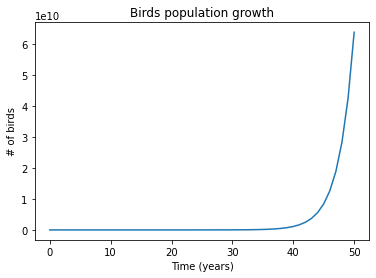

In [7]:
# Now we are ready to plot the Birds vs Time: first, we need to import a plotting library and name it
import matplotlib.pyplot as plt
plt.plot(Time,Birds)
plt.xlabel("Time (years)")
plt.ylabel("# of birds")
plt.title('Birds population growth')
plt.show()

Be careful! the beginning of the curve is not "flat", but the final scaling attenuates a lot the initial variations. Let's look how this curve build up over time ...


In [28]:
from IPython.display import HTML
HTML("""
<video width="640" height="480" controls loop autoplay>
  <source src="./Introductory%20Example.mp4" type="video/mp4">
</video>
""")

### What do you think? 
Maybe we’ve overestimated the birth rate, maybe only every other couple gives rise to a chick every year, yielding a birth rate of 0.25 on average. 
Does it sound better? Maybe a bit, yes. But that’s still over 7 million birds after 50 years, quite a lot! Can we change any other parameter? No. Yet, is our prediction for next year necessarily wrong? Likely not.  
The problem here is that our model does not account for any cause of bird death. While this simplifying assumption might hold when looking on the short term (next year, maybe 2 years), it is certainly wrong on the long term (5, 10, 50 years). Thus, any given model has its own range of applicability (or validity); it is obvious but yet important to make sure that this range includes the question we want to address. 
Now, let's modify our current model to account for a natural life expectancy of say, 5 years for each bird. This means that, on average, 1/5th of all birds dies of natural death every year. We will call this model "model 2". 

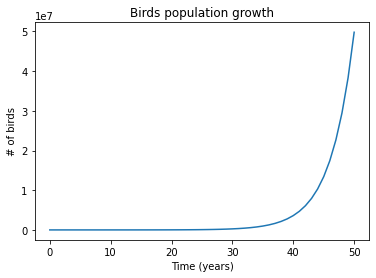

In [9]:
Death_rate = 1/5; 
# we set the yearly (natural) death rate to 1/5, so that on average every bird lives 5 years
# We repeat the "for" loop with this additional source of bird population variation:
# every year, the total population decreases by 1/5 (term - Birds[-1] * Death_rate)
Time=[0]
Birds=[100]
for year in range (1,51) :
    Birds = Birds + [Birds[-1] + Birds[-1] * Birth_rate - Birds[-1] * Death_rate]
    Time = Time + [year]
# Now we are ready to plot the Birds vs Time: first, we need to import a plotting library and name it
import matplotlib.pyplot as plt
plt.plot(Time,Birds)
plt.xlabel("Time (years)")
plt.ylabel("# of birds")
plt.title('Birds population growth')
plt.show()

In [10]:
# number of birds after 5 years
Birds[4]

285.60999999999996

In [11]:
# number of birds after 10 years
Birds[9]

1060.4499372999999

In [12]:
# number of birds after 50 years
Birds[49]

38302247.921471305

### What do you think? Did this improve our prediction on the bird population for the next 5-10 years? And what do you think on the 50 years horizon? 
Let’s have a close look to line 6 of the 4th cell. Can we simplify the mathematical expression Birds[-1] + Birds[-1] * Birth_rate - Birds[-1] * Death_rate? Is the output different with a birth rate of 0.3 and no death? Finally, is this model conceptually different from Example0_Birds_Model1? No, because it is possible to combine the parameters of Model 2 into the single parameter of Model 1, by simplifying the model 2 equation Birds[-1] + Birds[-1] * Birth_rate - Birds[-1] * Death_rate to a model 1-type equation  Birds[-1] + Birds[-1] * (Birth_rate - Death_rate) with effective parameter Birth_rate - Death_rate (the “net” birth rate). Here, we are in presence of 2 biologically distinct models that seem very different at first sight (one accounting for death, the other not), but which end up behaving the same way because the mathematical equations that represent the two models are identical, up to some parameter rescaling.  

So how can we improve our predictions on the longer term (50 years), and ensure that our model does not predicts billions of birds? We need for instance death rate to depend on the total population of birds.  
Let’s play a bit with the code of a third model (model ...3), where we will modify the effective death rate (line 15) and make it depend on the population of birds (linearly, quadratically, exponentially, …). Some adjustments of the death rate parameters might be needed as well. 

140.0
190.4
249.34784000000002
311.84741468733444
370.5223119838273
418.4966842979003
452.6055516785141
474.05654210755904
486.3552080463627
492.99142367572324
496.44659169576846
498.2106691373077
499.10213286371766
499.5502602664644
499.77492786740424
499.88741327623734
499.9436939623483
499.9718438108042
499.98592111263105
499.9929603581004
499.99648012949365
499.99824005235735
499.99912002308133
499.99956001076634
499.99978000518956
499.9998900025463
499.9999450012611
499.99997250062756
499.99998625031304
499.9999931251564
499.99999656257813
499.999998281289
499.9999991406445
499.9999995703223
499.9999997851611
499.9999998925806
499.99999994629036
499.99999997314524
499.99999998657256
499.9999999932862
499.99999999664317
499.99999999832164
499.9999999991609
499.9999999995804
499.99999999979025
499.99999999989507
499.9999999999476
499.99999999997374
499.9999999999869
499.9999999999935


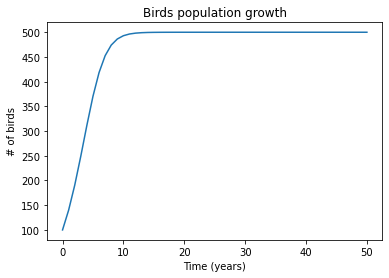

In [13]:
Birds_year0 = 100 
Birth_rate = 0.5
Death_rate = 0.001
# we import a maths function library that might be useful, see below
import math
# We repeat the "for" loop with an additional population decay term (- sign) which we modify as we want
Time=[0]
Birds=[100]
for year in range (1,51) :
    # first, choose how the decay term depends on the size of the population at each year (Birds[-1]):
    # choosing Effective_Death_rate = Death_rate is equivalent to models 1 and 2
    # choosing Effective_Death_rate = Death_rate * Birds[-1], or Death_rate * Birds[-1] * Birds[-1] ... is equivalent to say that the each single bird is more likely to die when the population grows
    # choosing Effective_Decay_rate = Death_rate/Birds[-1] is equivalent to say that each single bird is less likely to die when the population grows
    # ... many other possible choices (math.log(Birds[-1]), math.exp(Birds[-1]) ... )!!
    Effective_Death_rate = Death_rate * Birds[-1] # THIS IS THE LINE TO EDIT... REPLACE Birds[-1] by other functions of Birds[-1]
    Birds = Birds + [Birds[-1] + Birds[-1] * Birth_rate - Birds[-1] * Effective_Death_rate ]
    Time = Time + [year]
    print(Birds[-1])
    
import matplotlib.pyplot as plt
plt.plot(Time,Birds)
plt.xlabel("Time (years)")
plt.ylabel("# of birds")
plt.title('Birds population growth')
plt.show()



### What do you conclude? 
Are all types of effective death rate biologically acceptable? Which ones give a stable bird population over time? In the latter case, how does the different rates affect the long term (stable) population, which we generally call the “steady state”? Having an effective death rate that linearly depends on the total population is not a silly assumption. In fact, an increasing population of birds will attract to our forest an increasing number of bird predators, such as foxes. The growing number of foxes linearly increases the likelihood to be preyed for each single bird, resulting in an effective bird death rate that scales with the total number of foxes and then of birds. 

Another way to stabilize the population of birds over time is to assume that the effective birth rate depends on the total population of birds. This is also a reasonable assumption: when the food supply is limited, many animal species tend to slow down their reproduction. Because our forest is not extensible, let’s have a look to this situation in the next model (model 4). 

145.0
206.9875
289.059337421875
391.8113558574258
510.9589644967215
635.8989150453012
751.6646574900562
844.9971075752626
910.4856054576139
951.236389313662
974.4292497932466
986.8876932635552
993.3578803378023
996.6568812920976
998.3228524247013
999.1600198003559
999.57965711681
999.7897402143353
999.8948480025789
999.9474184728182
999.9737078540006
999.9868535813619
999.9934267042668
999.9967133305292
999.9983566598636
999.9991783285815
999.9995891639531
999.9997945818922
999.999897290925
999.9999486454573
999.9999743227273
999.9999871613633
999.9999935806816
999.9999967903408
999.9999983951703
999.9999991975852
999.9999995987927
999.9999997993963
999.9999998996982
999.9999999498491
999.9999999749245
999.9999999874623
999.9999999937312
999.9999999968655
999.9999999984328
999.9999999992165
999.9999999996082
999.9999999998041
999.999999999902
999.999999999951


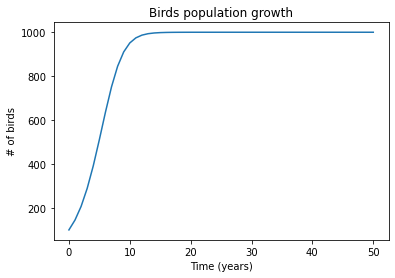

In [14]:
Birds_year0 = 100 
Birth_rate = 0.5
maxbirds = 1000
# We repeat the "for" loop with a modified birth rate that accounts for limited resources
Time=[0]
Birds=[100]
for year in range (1,51) :
    # We assume that the forest can feed 1000 birds (parameter maxbirds), and the less food there is, the less birds generate chicks
    # the amount of available food is proportional to 1 - Birds[-1]/maxbirds, so that food is completely depleted when the total number of birds, Birds[-1], equals maxbirds
    Effective_birth_rate = Birth_rate * (1 - Birds[-1]/maxbirds)
    Birds = Birds + [Birds[-1] + Birds[-1] * Effective_birth_rate ]
    Time = Time + [year]
    print(Birds[-1])
import matplotlib.pyplot as plt
plt.plot(Time,Birds)
plt.xlabel("Time (years)")
plt.ylabel("# of birds")
plt.title('Birds population growth')
plt.show()



We assume that the forest can sustain 1000 birds annually (parameter maxbirds), hence the available food supply is somewhat proportional to (1- bird population / 1000), so that it vanishes exactly when the number of birds reaches 1000. Our simple code Example0_Birds_Model3 cell 2 reveals that, indeed, reducing the reproduction rate due to limiting resources stabilizes the number of birds on the long term. We encourage you to modify the parameters, and observe their effects. If eventually you end up simulating a negative number of birds, try to reduce the initial number of birds (default: 100), this is a numerical issue and numerical implementation of the models will be the focus of another lecture. We observe that the population of birds stabilized to 1000 on the long term, which is exactly the maximal number of birds the forest can feed. Remember that, in this model again, there isn’t any death cause for birds: without the food limitation, the population would grow to infinity as in models 1 and 2. 
It is interesting here to compare the short term predictions of model 1 (exponential population growth, no death), and models 3 (death rate scaling with population) and 4 (limited resources). The bird counts after one year for the 2 latter are, with the default parameters, 140 and 145, i.e. very close to the 150 predicted by the most simple model, model 1. This is also somewhat true after 2 years, with 190 and 207 birds predicted by the complex models 3, 4 and 225 by the simplest one (10-15% difference). This observation emphasizes that extremely simple models can be almost as accurate as complex ones, provided that the question we want to address falls in the range of validity and the scope of the model. Predictions of the simple model get worse on the longer term.   
Finally, we encourage you to compare models 3 and 4. What do you think of the two Birds vs time curves? If you are still not convinced that they are very similar, go edit  the code on cell 1 and set the effective death rate to death_rate*Birds[-1] (effective death rate depends linearly on birds population, e.g. because of predators), and the death_rate parameter to 0.0005. Compare the curves and year by year populations between the 2 cells. What do you conclude? Remembering the comparison of the model equations between models 1 and 2, can you explain why? 

Those of you interested in going deeper in bird populations dynamics can try to model the effects of the migration of half of the bird population to another forest due to harsh winters occuring every 3 years, or the effects of an infectious disease epidemic that kills half of the birds once the population exceeds 1000 individuals (see corrections below). What happens if every other winter is harsh? and if the epidemic strikes as soon as the population exceeds 200?). 

### Exercise 1: modify model 2 to account for the migration of half of the bird population out of the forest every 3 years, for instance due to very harsh winter. What happens if every other winter is harsh? Can the bird specie disappear from the forest?

In [15]:
# %load solutionExo1.py

### Exercise 2: modify model 2 to account for an infectious disease that kills half of the birds if the population exceeds 1000. Plot the population over time. Modify the "1000" threshold. Can the bird specie completely disappear from the forest?

In [16]:
# %load solutionExo2.py

This trial and error approach that we used in this introductory example (model 3) is not usual: generally, as we will see in this course, the equations of the mathematical model are derived from the facts and hypotheses of the biological model, like in model 4 for instance. But this approach becomes useful when data is available (for instance, the entire Birds vs Time curve over the past 50 years), and we want to guess the underlying dynamics. Then, curve fitting techniques reveal the mathematical expression of the Birds vs Time curve, providing constraints on the underlying model and its parameters since, for instance, the effects of epidemics or migrations is qualitatively different from predators or limited resources. But as we have seen above, 2 different biological hypotheses (limiting resources in the forest, or presence of an increasing amount or predators, or even both!) can yield exactly the same mathematical equations and experimental observations. Hence, fitting the curve does not allow to distinguish between those fundamentally different biological hypotheses for the limitation of birds population. 

Going further would require, for instance, to set up an experiment where additional food is provided to the birds, or predators are prevented to enter the forest. In this situation, even though our modeling has not provided a definitive answer on the biological mechanism that underlies the limitation of bird population, it has somehow constrained such mechanisms and provided insight on experimental designs to chose between competing hypotheses. 

With this not-so-naïve example of the dynamics of a bird population, we have faced most challenges of mathematical modeling of biomedical systems. We have seen how to pick model ingredients depending on the scope of our model (long vs short term), how to do time-dependent modeling, the influence of various parameters on the model output and - more importantly - how to strip down a model to a minimal number of parameters, and how to use model predictions to design validation/improvement experiments. The type of mathematical equations that we have manipulated are broadly used in modeling of biomedical systems, as they are the natural language to describe the time evolution of interacting molecular systems (see further reading below). Now you’ll learn how to do all these modeling steps, build and solve such equations by yourself, and much more.

Further reading:

https://doi.org/10.1016/j.jtbi.2018.01.006 (Cancer research)

https://doi.org/10.3390/v13010014 (COVID-19 research)

https://doi.org/10.1007/s00285-019-01418-4 (eqs. 9-10-11, Autoimmune diseases research)

https://doi.org/10.1083/jcb.202003041 (Fundamental cell cycle research)

... and many more!

